# League of Legends: Exploring the Relationship Between Kills and Win Rate

## Introduction to League of Legends

Since its release in 2009 by Riot Games, League of Legends has become a massively popular multiplayer online battle arena (MOBA) game. It features intense team-based gameplay where two teams of five players compete to destroy the opposing team's Nexus, the main structure. Each player takes control of a unique Champion, each with their own distinct abilities and playstyle, adding depth and strategic complexity to the game. But League of Legends is more than just a game—it has been a driving force behind the meteoric rise of competitive esports.

Esports has revolutionized the world of gaming, transforming it into a realm of professional competition with massive prize pools and devoted fan bases. League of Legends has been at the forefront of this esports revolution, attracting millions of viewers worldwide and offering astonishing prize pools for its tournaments. The League of Legends World Championship, for example, boasted a staggering prize pool of $2,225,000 USD in 2022, solidifying the game's position as a cornerstone of the esports industry.

## Goal of the Project

Our project's goal is to discover meaningful relationships that can help us predict match outcomes in League of Legends. Specifically, we aim to answer the question: "What is the connection between a player's average number of kills per game and their corresponding win rate?"

## Data Preparation

The data we will be using for this project is complied by Pedro Cesar on Kaggle and is scrapped from https://lol.fandom.com/ to get historical match data, historical player data and, historical champion data from the 2011 worlds to 2022 worlds. For this project we will be using the historical player data.

In [70]:
# Loading the Kaggle dataset
df = pd.read_csv("E:\ModelDiversity\data\players_stats.csv")

In [10]:
# checking shape of
df.shape

(1283, 21)

## Variables Dictionary

We have 21 different variables in this dataset which are defined below:

`season` - the championship season. 1 = 2011 which is the first Worlds
`event` - Main stage event or play-in
`team` - team name
`player` - player name
`games_played` - number of games played in the tournament season
`wins` - number of wins throughout the tournament season
`loses` - number of loses throughout the tournament season
`win_rate` - how many successful wins throughout all the matches played throughout the tournament
`kills` - average number of kills per game throughout the tournament
`deaths` - average number of deaths per game throughout the tournament
`assists` - average number of assists per game throughout the tournament
`kill_death_assist_ratio` - KDA kills + assists divided by deaths
`creep_score` - average number of "minion's" that were killed per game throughout the tournament
`cs/min` - average creep score per minute per game throughout the tournament
`gold` - average gold earned per game throughout the tournament
`gold/min` - average gold earned per minute per game throughout the tournament
`damage` - average damage done per game throughout the tournament
`damage/min` - average damage done per minute per game throughout the tournament
`kill_participation` - average kills + assists / total team kills pre game throughout the tournament
`kill_share` - average kills / total team kills per game throughout the tournament
`gold_share` - average gold / total team gold per game throughout the tournament

## Packages

This project will utilize the following packages for data analysis, visualization, and model creation:

1. pandas - Data wrangling
2. numpy - Filling in missing data
3. missingno - visulization of missing values
4. seaborn - data visualization
5. plotly - data visualization

In [16]:
# Package importing
import pandas as np
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px

## Missing Data and Outliers

We can use pandas to get a summary of the missing values using the `.info()`

In [14]:
# Summary of column data types of counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   season                   1283 non-null   int64  
 1   event                    1283 non-null   object 
 2   team                     1283 non-null   object 
 3   player                   1283 non-null   object 
 4   games_played             1283 non-null   int64  
 5   wins                     1283 non-null   int64  
 6   loses                    1283 non-null   int64  
 7   win_rate                 1283 non-null   float64
 8   kills                    1283 non-null   float64
 9   deaths                   1283 non-null   float64
 10  assists                  1283 non-null   float64
 11  kill_death_assist_ratio  1283 non-null   float64
 12  creep_score              1283 non-null   float64
 13  cs/min                   1283 non-null   float64
 14  gold                    

We can get the percentage of missing values using `isnull()` and `sum()`

In [71]:
# Calculating the percentage of missing values
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).rename('Percentage of missing values') * 100

damage/min                 68.12159
damage                     68.12159
gold_share                 13.40608
kill_share                 13.40608
kill_participation         13.40608
kill_death_assist_ratio     0.00000
gold/min                    0.00000
gold                        0.00000
cs/min                      0.00000
creep_score                 0.00000
season                      0.00000
event                       0.00000
deaths                      0.00000
kills                       0.00000
win_rate                    0.00000
loses                       0.00000
wins                        0.00000
games_played                0.00000
player                      0.00000
team                        0.00000
assists                     0.00000
Name: Percentage of missing values, dtype: float64

In this dataset, the variables `kill_participation`, `kill_share`, and `gold_share` were not calculated until the 2014 4th Worlds tournament. This accounts for a 13.4% data gap in these categories. Fortunately, we can easily compute these parameters using numpy.

However, the variables 'Damage' and 'Damage/Min' present a different situation. These metrics were only tracked starting from the 2020 10th Worlds tournament, resulting in a significant 68.1% data deficiency in our current dataset. We will explore alternative data sources to fill in this missing statistic.

> Just a quick note: This information isn't really important for what we're currently studying, but it will be useful later on when we start looking at other models like multi-linear regression.

## missingno

Another way to visualize the missing values is from the package `missingno`.
Using bar charts and matrix plots we can see the significance of the missing values in our dataset.


<Axes: >

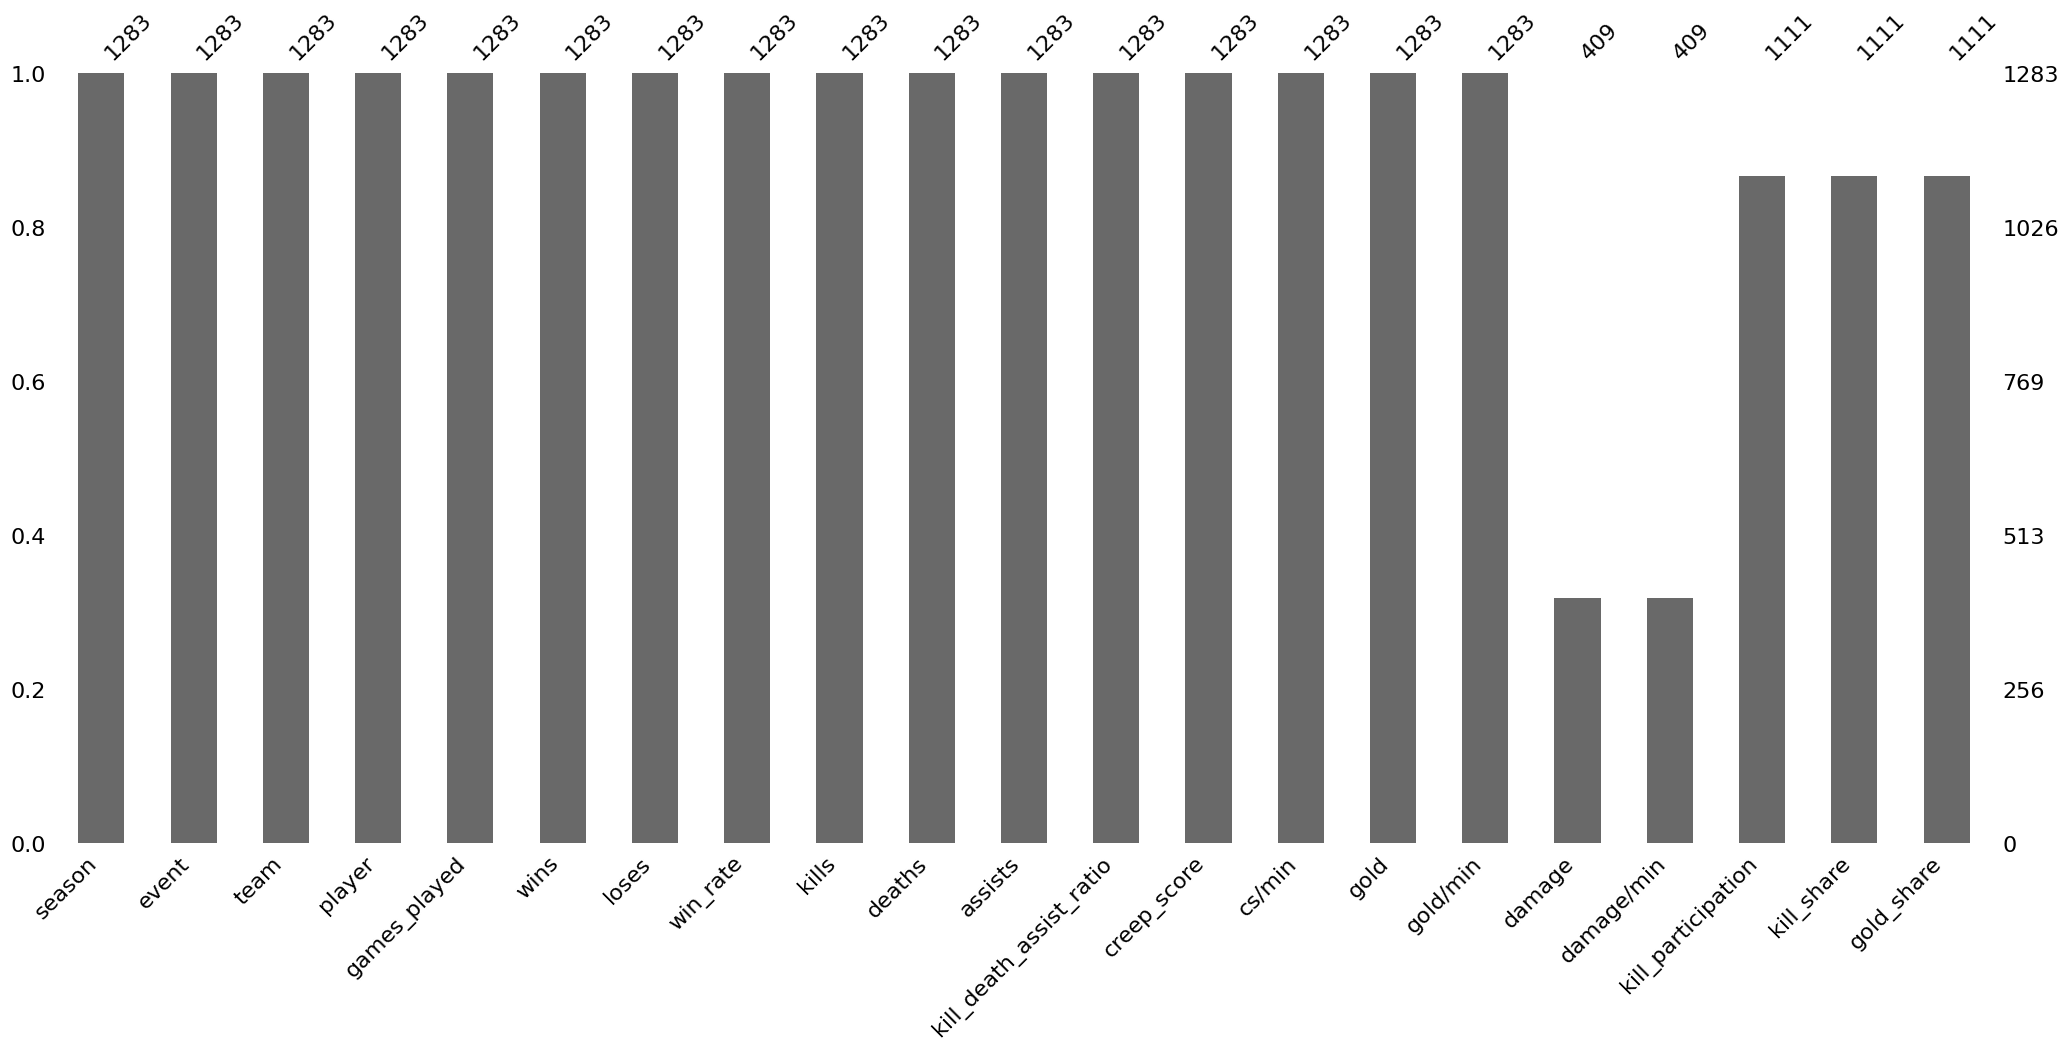

In [17]:
# Provides a bar chart of missing values
msno.bar(df)

The bar graph reiterates how significant the missing values are.

<Axes: >

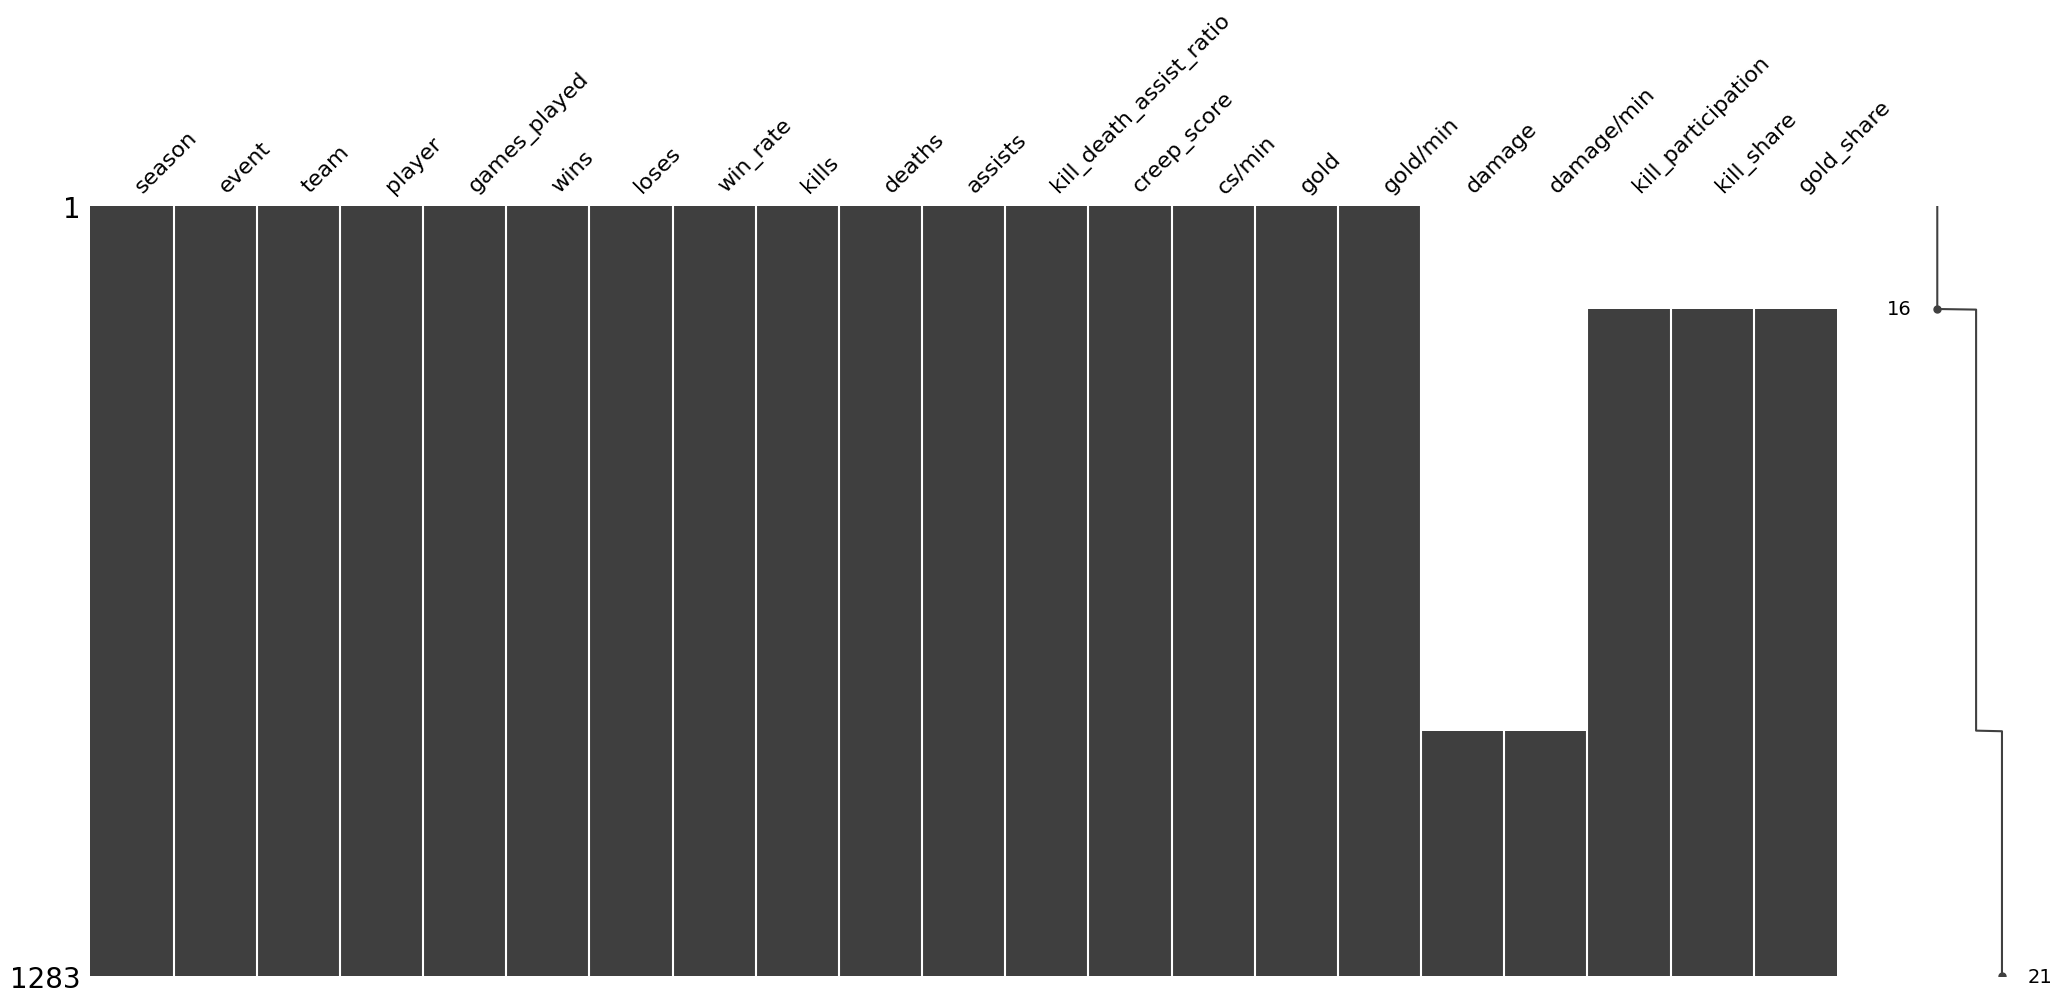

In [19]:
# Positional information on where the missing values are
msno.matrix(df)

We can use the matrix in the `missingno` package to visualize the missing values in our dataset. Looking at the matrix, we can see that the variables `kill_participation`, `kill_share`, and `gold_share` are missing data for the initial 3 years of the Worlds tournaments. Similarly, the variables `damage` and `damage/min` have missing values until the most recent editions of the Worlds tournaments. This aligns with our prior understanding of the dataset and confirms the presence of missing data in these specific variables.

## Missing values

Now that we have identified our missing values, we can start tackle them to get a more complete dataset.

### kill_participation, kill_share, gold_share

As mentioned above these variables can be derived with the information we currently have.

**kill_percentage**:
-  This is calculated by taking the average kills and assists for a player and dividing that by the number of total team kills during the tournament.

$$
    \text{kill percentage} = \frac{\text{average kills} + \text{average assist}}{\text{total team kills}}
$$

**kill_share**:
-  This is calculated by taking the average kills for a player and dividing that by the number of total team kills during the tournament.

$$
    \text{kill share} = \frac{\text{average kills}} {\text{total team kills}}
$$

**gold_share**:
-  This is calculated by taking the average gold for a player and dividing that by the number of total team gold during the tournament.

In [72]:
# Subset missing values
missing_values1 = df[df['season']<4]

# calculating average team gold per team each season
team_gold_1_3 = missing_values1.groupby(['season','team'])['gold'].sum().rename("team_gold")

# calculating average team kills per team each season
team_kills_1_3 = missing_values1.groupby(['season','team'])['kills'].sum().rename("team_kills")

# merging team_gold and team_kills back into dataframe
missing_values2 = missing_values1.merge(team_gold_1_3,how='outer',on=['season','team']).merge(team_kills_1_3,how='outer',on=['season','team'])

season  team                       
1       Against_All_authority          13.92
        Counter_Logic_Gaming           11.00
        Epik_Gamer                     17.57
        Fnatic                         21.17
        Pacific_eSports                 7.00
        TSM                            16.12
        Team_gamed_21-de                8.20
        Xan                            11.01
2       Azubu_Frost                    14.25
        Counter_Logic_Gaming            6.68
        Counter_Logic_Gaming_Europe    11.00
        Dignitas                        8.67
        Invictus_Gaming                16.20
        Moscow_Five                    15.80
        NaJin_Black_Sword              18.00
        SK_Gaming                       5.34
        Saigon_Jokers                  10.68
        TSM                            13.00
        Taipei_Assassins               14.78
        Team_WE                        16.67
3       Cloud9                         11.35
        Fnatic     

In [73]:
# filling in the gold_share using the calculation above
missing_values2['gold_share'] = round(missing_values2['gold']/missing_values2['team_gold'] * 100,2)

# filling in the kill_share using the calculation above
missing_values2['kill_share'] = round(missing_values2['kills']/missing_values2['team_kills'] * 100,2)

# filling in the kill_participation using the calculation above
missing_values2['kill_participation'] = round((missing_values2['kills']+missing_values2["assists"])/missing_values2['team_kills'] *100,2)


,season,event,team,player,games_played,wins,loses,win_rate,kills,deaths,...,cs/min,gold,gold/min,damage,damage/min,kill_participation,kill_share,gold_share,team_gold,team_kills
0,1,Main,Against_All_authority,Kujaa,12,7,5,58.3,0.25,2.58,...,0.34,7.8,198,NaN,NaN,61.64,1.80,14.18,55.0,13.92
1,1,Main,Against_All_authority,Linak,12,7,5,58.3,1.75,3.58,...,2.86,10.3,259,NaN,NaN,67.67,12.57,18.73,55.0,13.92
2,1,Main,Against_All_authority,MoMa,12,7,5,58.3,4.17,2.75,...,6.13,12.1,307,NaN,NaN,70.04,29.96,22.00,55.0,13.92
3,1,Main,Against_All_authority,sOAZ,12,7,5,58.3,4.00,2.92,...,5.43,11.6,293,NaN,NaN,79.60,28.74,21.09,55.0,13.92
4,1,Main,Against_All_authority,YellOwStaR,12,7,5,58.3,3.75,3.25,...,6.99,13.2,333,NaN,NaN,64.08,26.94,24.00,55.0,13.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,3,Main,TSM,Dyrus,8,2,6,25.0,2.50,5.38,...,5.90,10.6,296,NaN,NaN,53.73,16.79,20.38,52.0,14.89
168,3,Main,TSM,Reginald,8,2,6,25.0,3.38,5.00,...,6.09,10.8,302,NaN,NaN,57.15,22.70,20.77,52.0,14.89
169,3,Main,TSM,TheOddOne,8,2,6,25.0,2.63,3.63,...,3.68,9.3,260,NaN,NaN,68.91,17.66,17.88,52.0,14.89
170,3,Main,TSM,WildTurtle,8,2,6,25.0,5.38,4.00,...,8.26,13.4,375,NaN,NaN,74.75,36.13,25.77,52.0,14.89


In [74]:
# Updates our existing df
df.update(missing_values2)

After filling in our missing values we can quickly check to see if they filled in properly.

<Axes: >

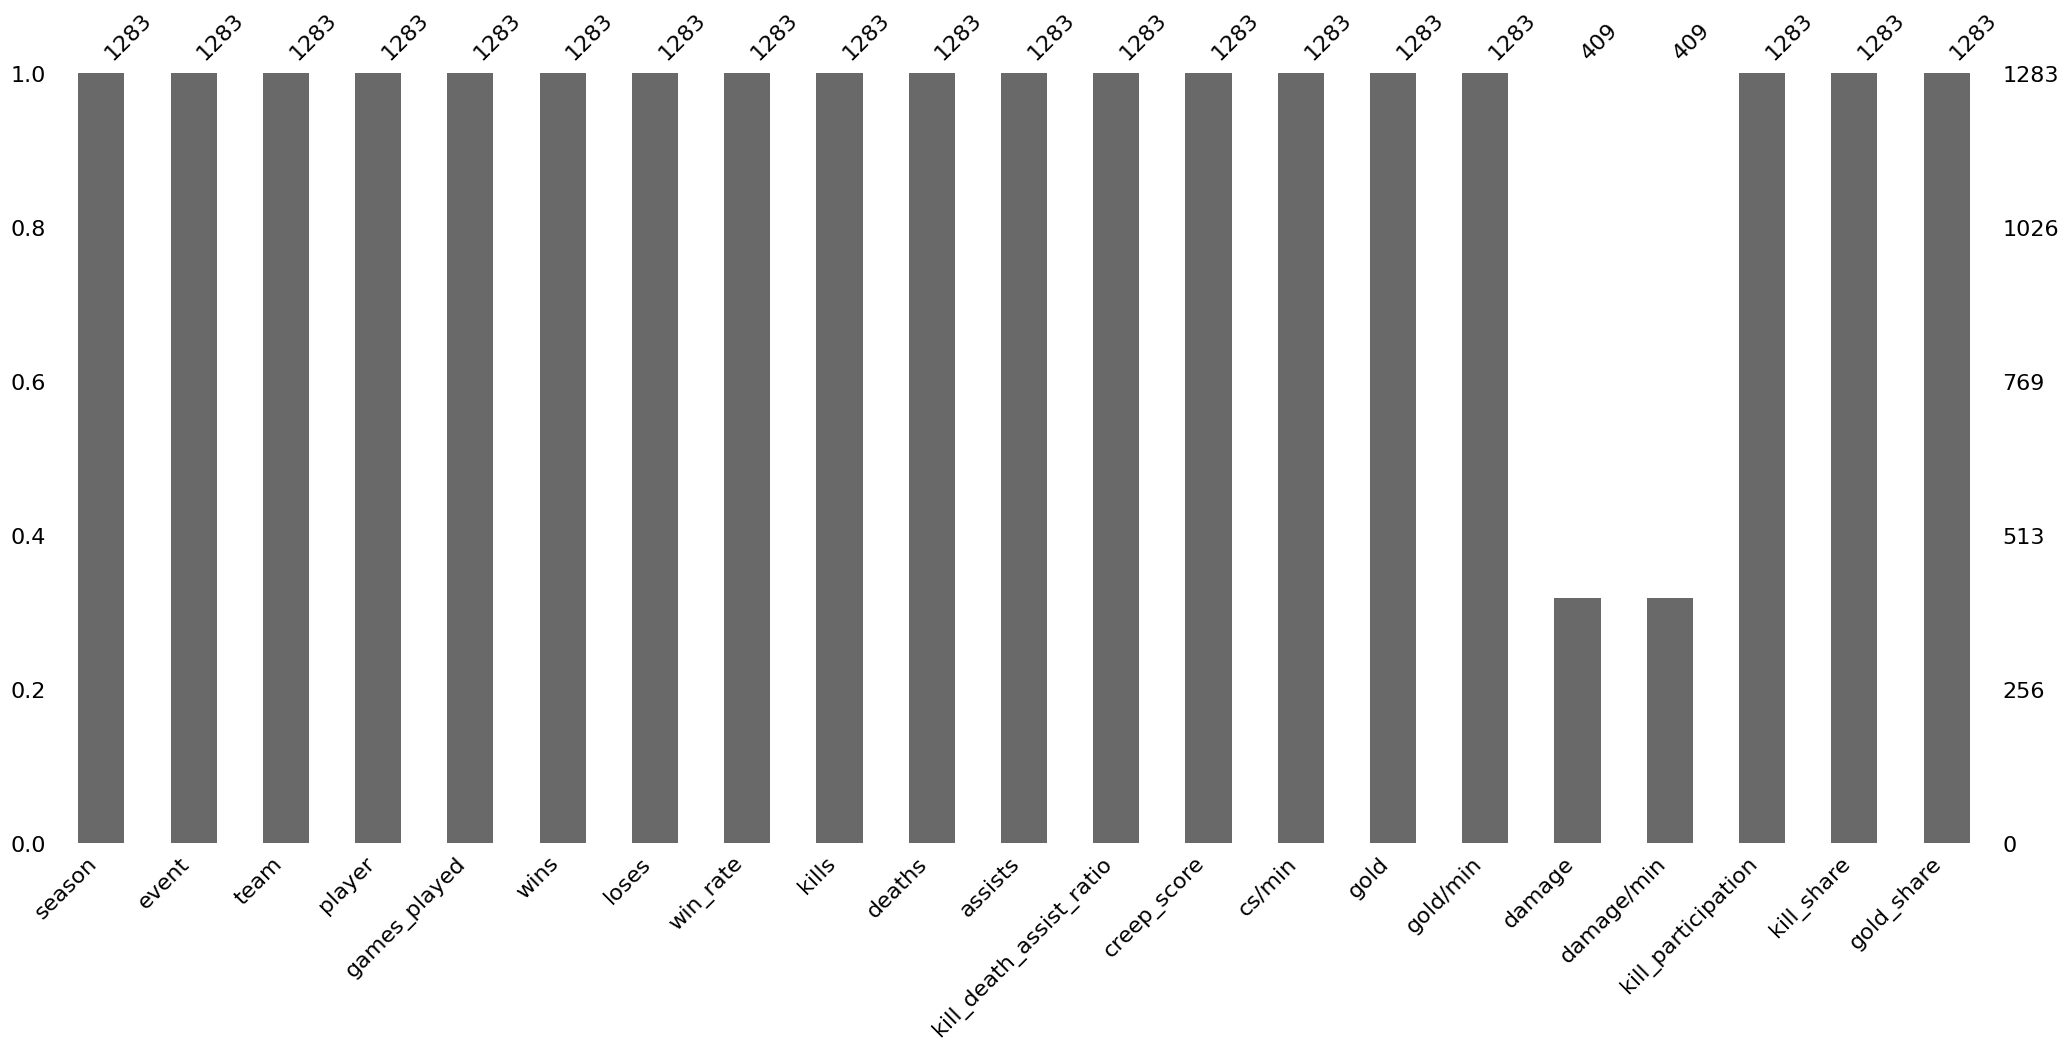

In [82]:
msno.bar(df)

Based on the bar graph, we can observe that the only information we are still missing are the damage and damage per minute columns. The game client began reporting damage starting from 2016, which reduces the amount of missing data from 68.1% to approximately 50%.

For our current research question, we can exclude these columns as we only require the win percentage. In future projects, we may explore methods to predict or estimate the missing damage values such as imputation or prediction using regression.

## Outliers

We can use two different methods to determine if there are any outliers within our dataset. First we will drop the two damage columns so that we have a complete dataset. Afterward, we examine each season using a histogram and a boxplot to see if there are any patterns and outliers in our dataset.

In [83]:
df

,season,event,team,player,games_played,wins,loses,win_rate,kills,deaths,...,kill_death_assist_ratio,creep_score,cs/min,gold,gold/min,damage,damage/min,kill_participation,kill_share,gold_share
0,1,Main,Against_All_authority,Kujaa,12,7,5,58.3,0.25,2.58,...,3.32,13.58,0.34,7.8,198,NaN,NaN,61.64,1.80,14.18
1,1,Main,Against_All_authority,Linak,12,7,5,58.3,1.75,3.58,...,2.63,113.17,2.86,10.3,259,NaN,NaN,67.67,12.57,18.73
2,1,Main,Against_All_authority,MoMa,12,7,5,58.3,4.17,2.75,...,3.55,242.25,6.13,12.1,307,NaN,NaN,70.04,29.96,22.00
3,1,Main,Against_All_authority,sOAZ,12,7,5,58.3,4.00,2.92,...,3.80,214.67,5.43,11.6,293,NaN,NaN,79.60,28.74,21.09
4,1,Main,Against_All_authority,YellOwStaR,12,7,5,58.3,3.75,3.25,...,2.74,276.33,6.99,13.2,333,NaN,NaN,64.08,26.94,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,12,Main,Top_Esports,JackeyLove,6,3,3,50.0,5.33,2.33,...,4.50,295.33,9.37,15.3,486,20700.0,656.0,76.80,39.00,26.10
1279,12,Main,Top_Esports,knight,6,3,3,50.0,4.33,1.17,...,8.43,283.50,8.99,13.9,442,22400.0,711.0,72.00,31.70,23.70
1280,12,Main,Top_Esports,Mark,6,3,3,50.0,1.17,2.00,...,5.25,24.00,0.76,7.7,245,5400.0,171.0,76.80,8.50,13.10
1281,12,Main,Top_Esports,Tian,6,3,3,50.0,1.83,2.33,...,3.93,174.00,5.52,10.5,332,10900.0,344.0,67.10,13.40,17.80
